# sivtempfit generative model testing

**Ruffin Evans**

2016-04-18

Last Update: 2016-05-05

This notebook loads in and performs some simple tests on the generative model that will be used to fit the spectra data in this package.

See model-development.ipynb for model development and explanation.

## Standard Imports

In [2]:
# makes plots display inline in notebook interface:
%matplotlib inline 

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
import emcee
import pandas as pd
import seaborn as sns
import scipy.stats as stats # Use for KDE in the end
import scipy.optimize as opt # Use for minimizing KDE
import scipy as sp
sns.set_style("whitegrid")

### Import package modules

In [3]:
import sivtempfit.dataprocessing as dp
import sivtempfit.io as io
import sivtempfit.model as model
from sivtempfit.model import *

### Simple tests for model

Before we do the full monte carlo treatment, let's test that our likelihood function behaves in a reasonable way on test data. The simplest way to do this is to just use data generated from our model and see if our likelihood function is peaked where it should be. Later, I will run these tests with emcee and the unit testing framework, but for now let's just check the basics.

#### Setup

Load simple test case, with data from the function plus gaussian noise of mean 1 and standard deviation 0.5.

In [16]:
simulated_spectrum = io.load_Spectrum("sivtempfit/exampledata/simulated_spectrum_realistic.json")
print(simulated_spectrum.metadata['Description'])

Data generated from two_peak_model with the following command:
xrange = np.arange(730,750,0.05)
ydata = model.two_peak_model(xrange, 6000, 100, 9, 731, 15, 0.15, 100) + 1*np.random.normal(1000,10,400)


[730, 750, 1100, 1700]

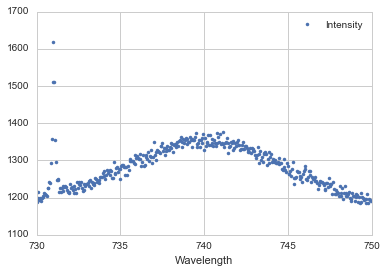

In [24]:
simulated_spectrum.data.plot('Wavelength', 'Intensity', style = '.')
plt.axis([730, 750, 1100, 1700])

##### Test sensitivity to background parameters

Should be peaked at 1000:

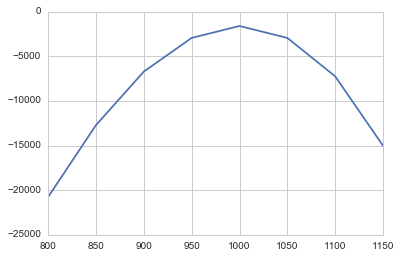

In [27]:
test_amp_list = np.arange(800,1200,50)
test_ll = [two_peak_log_likelihood_Spectrum(simulated_spectrum, 6000, 100, 0, 0, 9, 731, 15, 0.15, 100, x, 10) for x in test_amp_list]
plt.plot(test_amp_list, test_ll)

Should be peaked at 100:

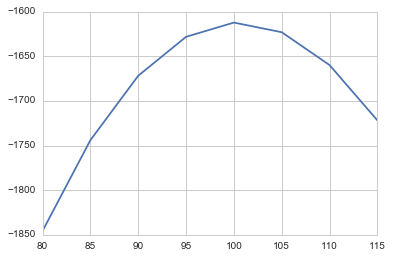

In [28]:
test_amp_list = np.arange(80,120,5)
test_ll = [two_peak_log_likelihood_Spectrum(simulated_spectrum, 6000, 100, 0, 0, 9, 731, 15, 0.15, x, 1000, 10) for x in test_amp_list]
plt.plot(test_amp_list, test_ll)

##### Test sensitivity to amplitudes

First, test to make sure the likelihood has a sharp peak when the amplitudes of the two peaks in the model are properly selected.

This graph should be peaked around 6000:

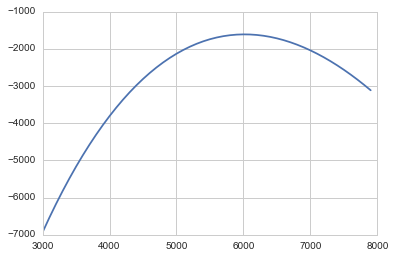

In [30]:
test_amp_list = np.arange(3000,8000,100)
test_ll = [two_peak_log_likelihood_Spectrum(simulated_spectrum, x, 100, 0, 0, 9, 731, 15, 0.15, 100, 1000, 10) for x in test_amp_list]
plt.plot(test_amp_list, test_ll)

This should be peaked around 100, the amplitude of the other peak.

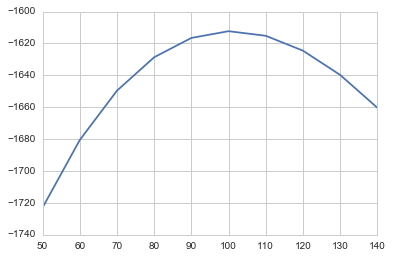

In [32]:
test_amp_list = np.arange(50,150,10)
test_ll = [two_peak_log_likelihood_Spectrum(simulated_spectrum, 6000, x, 0, 0, 9, 731, 15, 0.15, 100, 1000, 10) for x in test_amp_list]
plt.plot(test_amp_list, test_ll)

... you get the idea. All of these tests are now performed automatically by the testing package, so you can just run `nosetests` from the root directory. If the tests run, then the maxima for the likelihoods is where it should be.